In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape= (250,250,3), include_top=False, weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable=False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import Model
x = pre_trained_model.output

x = layers.Flatten()(x)
x = layers.Dense(1024,activation = 'sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input,x)
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Train', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 4745 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Valid', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 1582 images belonging to 2 classes.


In [ ]:

history= model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch=296,
                             validation_steps=98,
                             epochs = 85,   
                             verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/85
296/296 [==============================] - 5172s 17s/step - loss: 0.7809 - acc: 0.7357 - val_loss: 0.4290 - val_acc: 0.8099
Epoch 2/85
296/296 [==============================] - 164s 553ms/step - loss: 0.4097 - acc: 0.8184 - val_loss: 0.4732 - val_acc: 0.8138
Epoch 3/85
296/296 [==============================] - 156s 527ms/step - loss: 0.3747 - acc: 0.8420 - val_loss: 0.4154 - val_acc: 0.8348
Epoch 4/85
296/296 [==============================] - 154s 519ms/step - loss: 0.3464 - acc: 0.8458 - val_loss: 0.4740 - val_acc: 0.8259
Epoch 5/85
296/296 [==============================] - 155s 524ms/step - loss: 0.3410 - acc: 0.8543 - val_loss: 0.4489 - val_acc: 0.8138
Epoch 6/85
296/296 [==============================] - 153s 517ms/step - loss: 0.3410 - acc: 0.8511 - val_loss: 0.4292 - val_acc: 0.8246
Epoch 7/85
296/296 [==============================] - 153s 516ms/step - loss: 0.3319 - acc: 0.8513 - val_loss

In [ ]:
model.save('/content/drive/My Drive/Models/InceptionV3_final.h5')

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


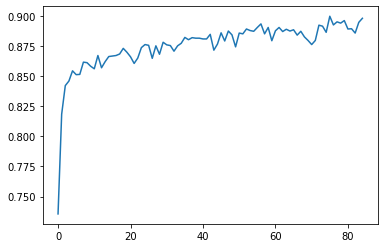

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.show()

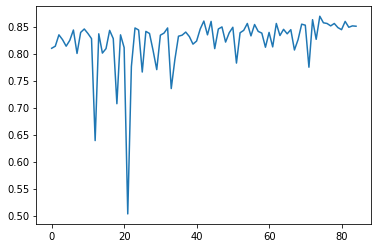

In [ ]:
plt.plot(history.history['val_acc'])

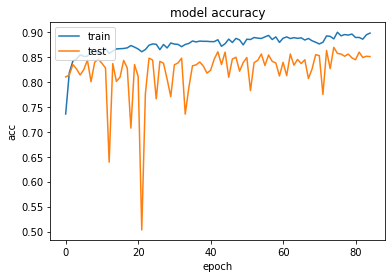

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

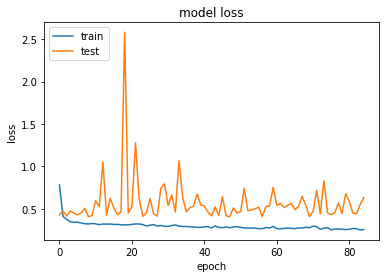

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Test', batch_size = 16, class_mode='categorical', target_size=(250,250))

Found 1582 images belonging to 2 classes.


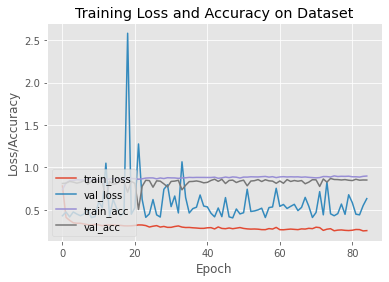

In [ ]:
import numpy as np
N=85
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
scores = model.evaluate(test_generator)

99/99 [==============================] - 1224s 12s/step - loss: 2.2762 - acc: 0.5000


In [ ]:
predIdxs = model.predict(x=test_generator, steps=(98) + 1)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
sensitivity

0.6

In [ ]:
specificity

0.52

In [ ]:
Fmeasure = (2 * sensitivity * specificity) / (sensitivity + specificity)
Fmeasure

0.557142857142857